## Demo for modelling lattice light-sheet PSF from bead data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('Running on GPU')
except:
    print('Running on CPU')


Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='voxel',channeltype='1ch',sysfile='LLS')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/1ch_LLS_bead/'
L.param.savename = L.param.datapath+'psfmodel'
L.param.keyword = 'scan' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.FOV.z_step = 2  
L.param.pixel_size.z = 0.0578 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 100 
L.param.roi.bead_radius = 0.0
L.param.batch_size = 1000 # lower this number if out of memory
L.param.option.model.var_photon = True
L.param.loss_weight.Inorm = 0



#### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_LLS_bead\sample_scan_25ms_560_z50nm_ROI1.tiff
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_LLS_bead\sample_scan_25ms_560_z50nm_ROI2.tiff
E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_LLS_bead\sample_scan_25ms_560_z50nm_ROI3.tiff
(3, 2001, 512, 256)
rois shape channel : (97, 37, 28, 57)
deskewed rois shape channel : (97, 37, 27, 27)


3/6: learning: 167/250 [00:14s] 11.71it/s, current loss: 41.30376, total time: 14.25s
c:\Users\Sheng\Documents\git\python\uiPSF\demo\..\psflearning\learning\psfs\PSFVolumeBased_file.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  I_model = I_model.astype(np.float32)
4/6: calculating spline coefficients: 1/1 [00:02s]  2.19s/it total time: 16.43s
5/6: localization: 4/4 [00:00s]  7.17it/s total time: 16.99s


outlier id: [ 2 18 24 31 38 42 57 62 81 96]
rois shape channel : (87, 37, 27, 27)


3/6: learning: 255/? [00:21s] 12.12it/s, current loss: 32.62067, total time: 38.02s  
4/6: calculating spline coefficients: 1/1 [00:02s]  2.20s/it total time: 40.22s
5/6: localization: 4/4 [00:00s]  8.15it/s total time: 40.71s
6/6: saving results: [00:04s] total time: 45.38s


#### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

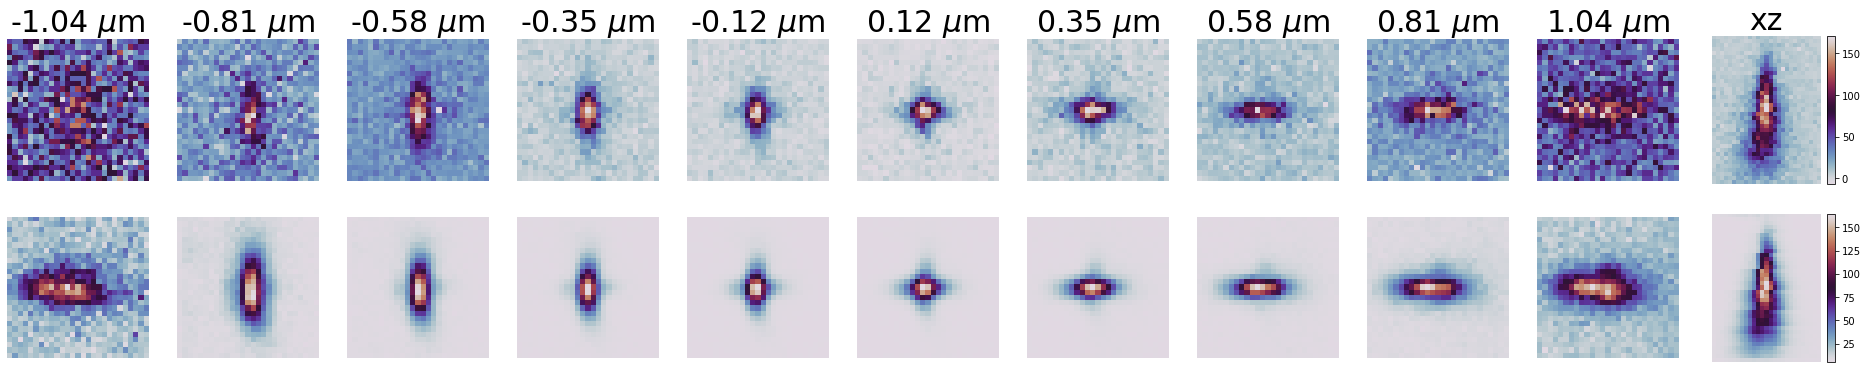

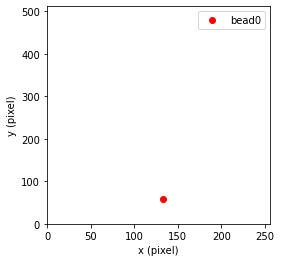

In [7]:
showpsfvsdata(f,p,index=0)

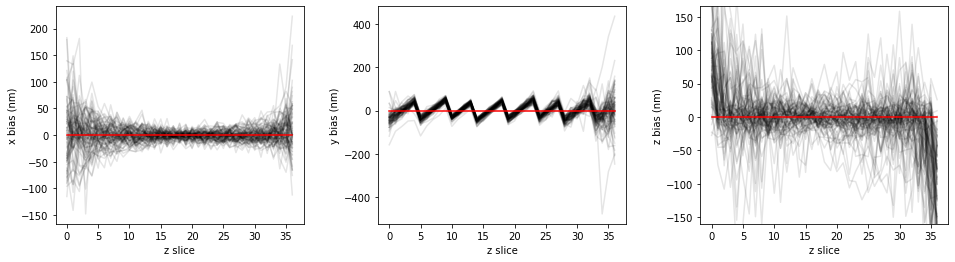

In [8]:
showlocalization(f,p)

##### Optional plots

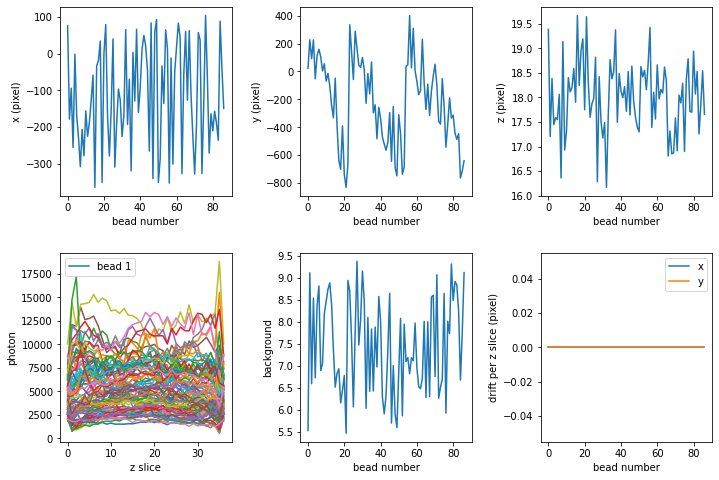

In [9]:
showlearnedparam(f,p)

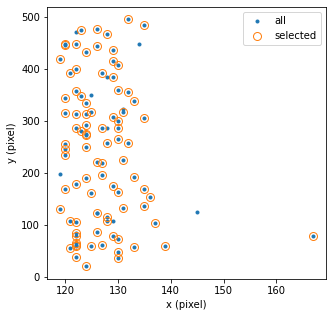

In [10]:
showcoord(f,p)

#### Ouput parameters

In [10]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'I_model_bead', 'I_model_reverse', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
